In [107]:
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from IPython.display import display, HTML 
%matplotlib inline

In [108]:
#The data for Clustering 
data = np.loadtxt('PCA.csv', delimiter=",")

In [109]:
#Calculating clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
kmeans.cluster_centers_

array([[  46.1875    ,  140.9375    ,   55.1875    ],
       [  30.88235294,  112.11764706,   30.05882353],
       [  40.25      ,  230.75      ,   55.75      ],
       [  40.51851852,   77.96296296,   43.37037037]])

In [110]:
#Lableing each cluster
kmeans.labels_

array([3, 1, 1, 0, 0, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 2, 0, 1, 3, 3, 1, 3, 3,
       3, 0, 3, 1, 3, 3, 1, 3, 0, 3, 0, 3, 3, 1, 3, 0, 3, 0, 0, 2, 0, 0, 2,
       3, 1, 1, 3, 1, 2, 3, 0, 3, 1, 1, 0, 3, 0, 0, 3, 1, 0], dtype=int32)

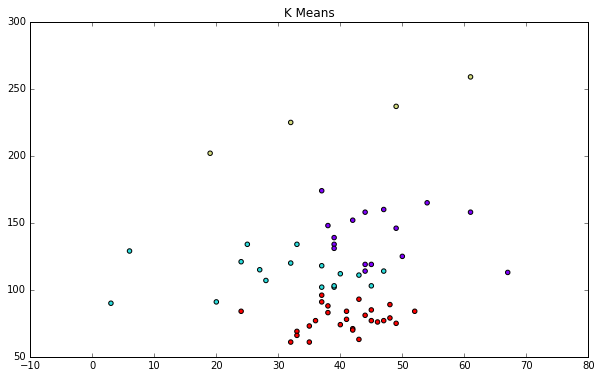

In [115]:
#Plotting each cluster label
f, (ax1) = plt.subplots(1, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[:,0],data[:,1],c=kmeans.labels_,cmap='rainbow')

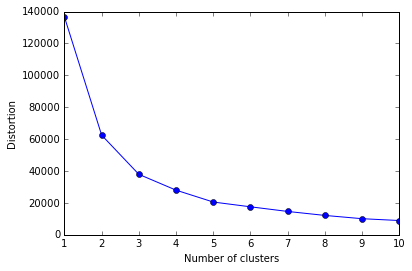

In [116]:
#Making sure of the correctness of the number of clusters by using Elbow anlaysis
distortions = []

for i  in range(1,11):              
    km = KMeans(n_clusters=i,
                init='k-means++',    
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(data)                        
    distortions.append(km.inertia_) 

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

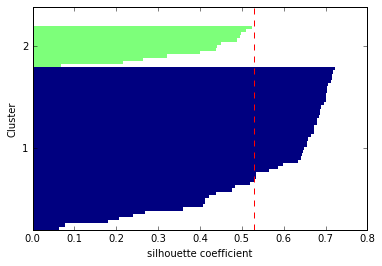

In [118]:
#Making sure of the correctness of the number of clusters by using Sitlasus anlaysis
cluster_labels = np.unique(y_km)      
n_clusters=cluster_labels.shape[0]    

silhouette_vals = silhouette_samples(data,y_km,metric='euclidean') 

y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)  
        color = cm.jet(float(i)/n_clusters)        
        plt.barh(range(y_ax_lower,y_ax_upper),    
                         c_silhouette_vals,       
                         height=1.0,          
                         edgecolor='none', 
                         color=color)       
        yticks.append((y_ax_lower+y_ax_upper)/2) 
        y_ax_lower += len(c_silhouette_vals)   

silhouette_avg = np.mean(silhouette_vals)  
plt.axvline(silhouette_avg,color="red",linestyle="--") 
plt.yticks(yticks,cluster_labels + 1)  
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [ ]:
silhouette_avg

In [119]:
data

array([[  32.,   61.,   32.],
       [  25.,  134.,    9.],
       [  43.,  111.,   54.],
       [  45.,  119.,   54.],
       [  44.,  114.,   66.],
       [  38.,   83.,   35.],
       [  32.,  120.,   23.],
       [  42.,   71.,   41.],
       [  47.,  114.,   36.],
       [  48.,   89.,   51.],
       [  43.,   93.,   39.],
       [  40.,  112.,   52.],
       [  28.,  107.,   38.],
       [  35.,   61.,   38.],
       [  37.,   91.,   60.],
       [  32.,  225.,   42.],
       [  38.,  148.,   40.],
       [  27.,  115.,   20.],
       [  48.,   79.,   45.],
       [  45.,   77.,   75.],
       [   6.,  129.,    0.],
       [  36.,   77.,   25.],
       [  46.,   76.,   49.],
       [  35.,   73.,   52.],
       [  39.,  139.,   59.],
       [  43.,   63.,   44.],
       [  39.,  102.,   48.],
       [  41.,   78.,   38.],
       [  41.,   84.,   44.],
       [  20.,   91.,   14.],
       [  49.,   75.,   54.],
       [  67.,  113.,   61.],
       [  33.,   69.,   23.],
       [  

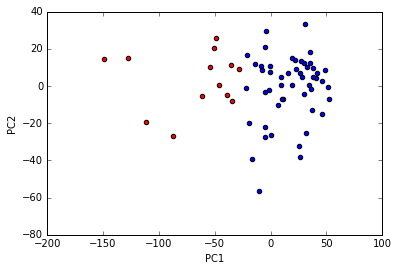

In [137]:
from sklearn.decomposition import PCA
users = np.loadtxt('PCA.csv', delimiter=",")
# K-means
model = KMeans(n_clusters=2).fit(users)

#Primary Compornent Analysis
pca = PCA(n_components=2)
users_r = pca.fit_transform(users)
plt.figure()
for (i, label) in enumerate(model.labels_):
    if label == 0:
        plt.scatter(users_r[i, 0], users_r[i, 1], c='red')
    elif label == 1:
        plt.scatter(users_r[i, 0], users_r[i, 1], c='blue')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [138]:
users_r

array([[  5.26133698e+01,  -7.24966718e+00],
       [ -1.67448871e+01,  -3.91493424e+01],
       [ -8.70574609e-02,   1.07967079e+01],
       [ -8.10969252e+00,   1.09015640e+01],
       [ -4.53806271e+00,   2.09065536e+01],
       [  3.01713581e+01,  -4.20428101e+00],
       [ -4.83471962e+00,  -2.19978754e+01],
       [  4.11833432e+01,   4.43571050e+00],
       [ -1.09032558e+00,  -2.28615102e+00],
       [  2.18738199e+01,   1.37705430e+01],
       [  1.95565215e+01,   6.06035275e-01],
       [ -7.09136479e-01,   7.37578796e+00],
       [  6.44538916e+00,  -1.01615127e+01],
       [  5.17663603e+01,  -6.41199308e-01],
       [  1.92974785e+01,   1.49542279e+01],
       [ -1.11250315e+02,  -1.92572937e+01],
       [ -3.48982777e+01,  -8.10530518e+00],
       [  7.01345911e-01,  -2.65988487e+01],
       [  3.25085561e+01,   1.00406157e+01],
       [  3.10446080e+01,   3.34807072e+01],
       [ -9.88067767e+00,  -5.63780048e+01],
       [  3.74031894e+01,  -1.28346275e+01],
       [  

In [139]:
pca.explained_variance_ratio_

array([ 0.84261772,  0.13890078])

In [140]:
pca.components_

array([[-0.04373948, -0.99189451, -0.11929852],
       [ 0.54720193, -0.12369348,  0.82781035]])

In [141]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.84261772,  0.9815185 ])